In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [2]:
# Load SDG test dataset
sdg_test_df = pd.read_csv('D:/AmritaUniversity/AmmachiLabs/CapacityBuildingPortal/flask-backend/DashboardApi/text_analysis/datasets/sdg_test_dataset.csv')

In [3]:
# Load the SDG classification model and tokenizer
model_path = 'D:/AmritaUniversity/AmmachiLabs/CapacityBuildingPortal/flask-backend/DashboardApi/text_analysis/SDGFinal'
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

In [4]:
# Function to analyze text (SDG classification)
def analyze_text(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

        predictions = torch.softmax(logits, dim=1)[0]
        sdg_scores = {f"SDG {idx + 1}": score.item() for idx, score in enumerate(predictions)}
        sorted_sdg_scores = dict(sorted(sdg_scores.items(), key=lambda item: item[1], reverse=True))
    
    return sorted_sdg_scores

# Evaluate SDG Classification
sdg_predictions = []
sdg_labels = sdg_test_df['sdg'].values - 1  # Adjust labels to range from 0 to 16

for text in sdg_test_df['text']:
    sorted_sdg_scores = analyze_text(text)
    sdg_predictions.append(int(max(sorted_sdg_scores, key=sorted_sdg_scores.get).split()[1]) - 1)

sdg_accuracy = accuracy_score(sdg_labels, sdg_predictions)
sdg_precision, sdg_recall, sdg_f1, _ = precision_recall_fscore_support(sdg_labels, sdg_predictions, average='weighted')

print(f"SDG Classification - Accuracy: {sdg_accuracy}, Precision: {sdg_precision}, Recall: {sdg_recall}, F1-Score: {sdg_f1}")

SDG Classification - Accuracy: 0.9351168511685117, Precision: 0.9347781801607645, Recall: 0.9351168511685117, F1-Score: 0.9346442303569819


SDG Classification - Accuracy: 0.9351, Precision: 0.9348, Recall: 0.9351, F1-Score: 0.9346


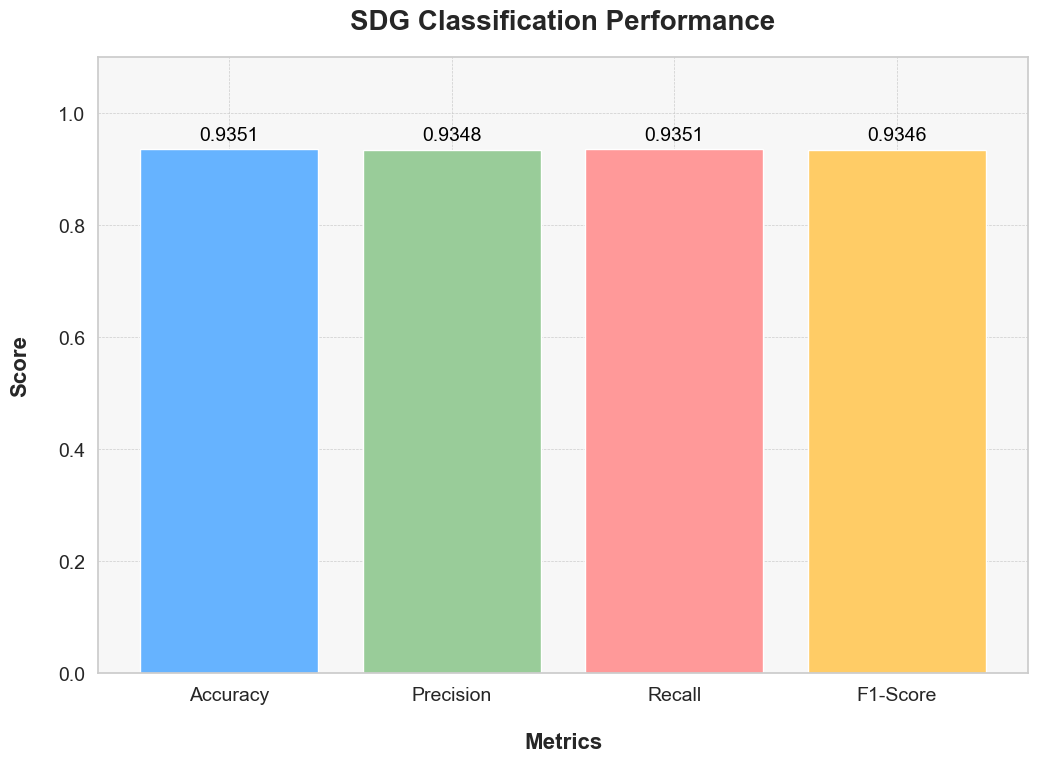

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print SDG Classification Results
print(f"SDG Classification - Accuracy: {sdg_accuracy:.4f}, Precision: {sdg_precision:.4f}, Recall: {sdg_recall:.4f}, F1-Score: {sdg_f1:.4f}")

# Data for plotting
sdg_metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
sdg_values = [sdg_accuracy, sdg_precision, sdg_recall, sdg_f1]
colors = ['#66b3ff', '#99cc99', '#ff9999', '#ffcc66']

# Set the style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 8))

# Plot each bar individually with the custom colors
bars = plt.bar(sdg_metrics, sdg_values, color=colors)

# Add annotations
for bar, value in zip(bars, sdg_values):
    plt.annotate(f'{value:.4f}', (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                 ha='center', va='center', fontsize=14, color='black', xytext=(0, 10),
                 textcoords='offset points')

# Set title and labels
plt.title('SDG Classification Performance', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Metrics', fontsize=16, fontweight='bold', labelpad=20)
plt.ylabel('Score', fontsize=16, fontweight='bold', labelpad=20)
plt.ylim(0, 1.1)

# Customize the grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_axisbelow(True)

# Customize tick parameters
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add background color to the plot area
plt.gca().set_facecolor('#f7f7f7')

# Show the plot
plt.show()
